# Visit With Us Travel Package

## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Structure

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import Important Libraries

In [1]:
# import packaged: numpy, pandas, plotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ensure plots run in notebook

In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

### Disable Warning

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Import Data and Read A Few Sample Lines

In [4]:
# import data from excel
original_data = pd.read_excel('Tourism.xlsx', sheet_name="Tourism")

# make a copy of the data in case of data corruption
data = original_data.copy()

# seed np random selection
np.random.seed(1)

# show 1o random rows
data.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


### Show our dataset shape

In [5]:
# see data shape
print(f'Our dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

Our dataset has 4888 rows and 20 columns.


### Dataset information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observation**

* We observe that TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, and Designation are all object types.
* And all other variables are numeric types of Integer and Floats.
* Some of these variables will be converted to categorical type before we use them in the models

### Check for missing values

In [7]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Observation**

* There are a number of missing values across different variables.
* These will be treated soon

### Identify and convert my categorical variables

In [8]:
category_variables = ['ProdTaken', 'CityTier', 'TypeofContact', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
                      'ProductPitched', 'MaritalStatus', 'Designation', 'Passport', 'PitchSatisfactionScore', 
                      'OwnCar', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfPersonVisiting', 
                      'PitchSatisfactionScore', 'NumberOfChildrenVisiting']


In [9]:
#convert all object types to categorical variables

for c in category_variables:
    data[c] = data[c].astype('category')

### Checking my data basic summary

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


**Observation**

- We have a minimum age of 18 and maximum of 61, and mean and median are both 37. This seem to be normally distributed.
- DurationOfPich has a minimum of 5 minutes and maximum of 127. With mean and median of 15 and 14, we should expect outliers.

In [11]:
data.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
NumberOfFollowups,4843,6,4,2068
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340


### Show unique values in my variables

In [12]:
# checking unique values in variables

print("UNIQUE VALUES:")
for c in category_variables:
    print(' '*50)
    print(c,':')
    print(data[c].value_counts())
    print(' '*50)
    print('*'*50)

UNIQUE VALUES:
                                                  
ProdTaken :
0    3968
1     920
Name: ProdTaken, dtype: int64
                                                  
**************************************************
                                                  
CityTier :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
                                                  
**************************************************
                                                  
TypeofContact :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
                                                  
**************************************************
                                                  
Occupation :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
                                                  
**************************************************
       

**Observation**

* All unique values seem to be good except Gender and MaritalStatus
* For Gender, we need to replace "Fe Male" with "Female"
* And for Marital Status, "Unmarried" should be the same as "Single"

## Data Preparation

### Drop columns which do not have relevant information 

In [13]:
# we will drop customerID because it is just a unique ID that is no longer needed

data.drop(['CustomerID'], axis=1, inplace=True)

### Correct mispelled wordings in the columns

In [14]:
# Gender: replace "Fe male" with "female"

data['Gender'].replace('Fe Male', 'Female', inplace=True)

# Marital Status: "Unmarried" should be the same as "Single".
# So we will replace Unmarried with Single
data['MaritalStatus'].replace('Unmarried', 'Single', inplace=True)


### Treating missing values

#### Identify all categorical variables

In [15]:
category_variables = data.select_dtypes(['category'])
category_variables.columns

Index(['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation'],
      dtype='object')

#### Identify all numerical variables

In [16]:
numeric_variables = data.select_dtypes(np.number)
numeric_variables.columns

Index(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome'], dtype='object')

#### Treat missing values in both types

In [17]:
# Treat missing values in numerical variables by replacing with mean
for n in numeric_variables.columns:
    col_mean = data[n].mean()
    data[n].fillna(data[n].mean(), inplace=True)


# Treat missing values in categorical variables by replacing with mode
for c in category_variables.columns:
    data[c].fillna(data[c].mode()[0], inplace=True)

### Confirm that we have treated all missing values

In [18]:
data.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**Observation**

* You will observe that we do not have anymore missing values

## EDA

### Univariate Analysis on Numeric Variables

In [19]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observation on age

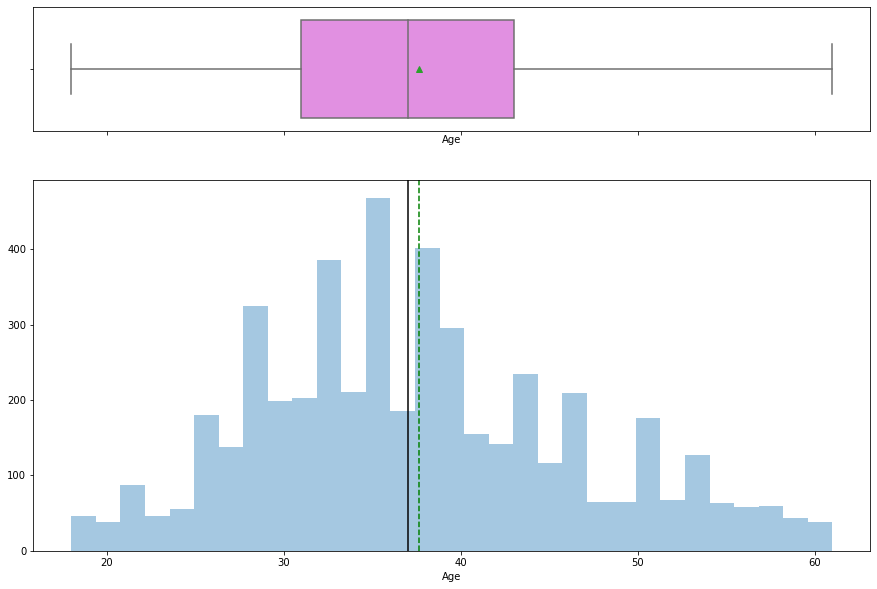

In [20]:
histogram_boxplot(data['Age'])

* Age looks normally distributed with no outliers
* Both mean and median age is 37.

### Observations on Duration of Pitch

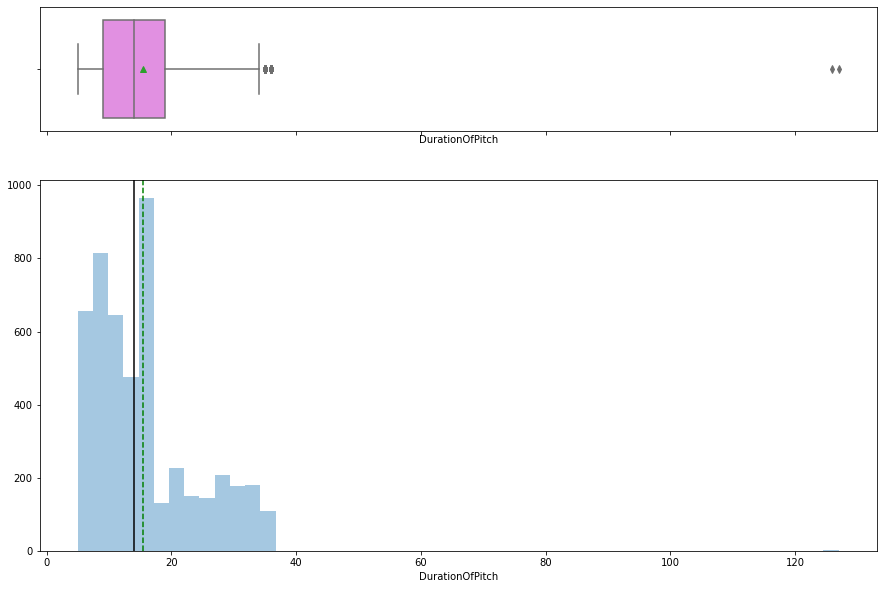

In [21]:
histogram_boxplot(data['DurationOfPitch'])

* DurationOfPitch looks skewed to the right with a few outliers to the right too.
* Mean is 15 while median is 14

### Observsations on NumberOfTrips

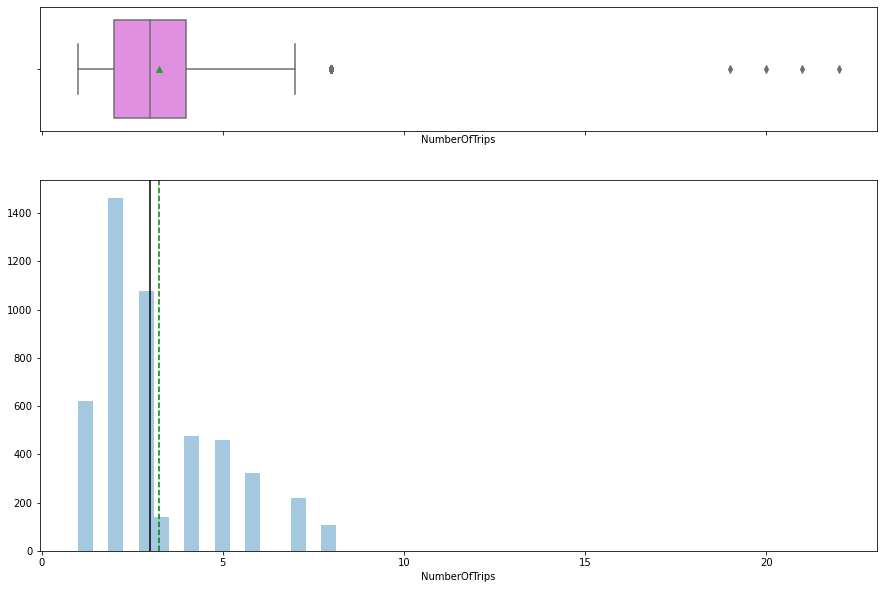

In [22]:
histogram_boxplot(data['NumberOfTrips'])

**We notice a few outliers to the right of the distribution**

### Observations on MonthlyIncome

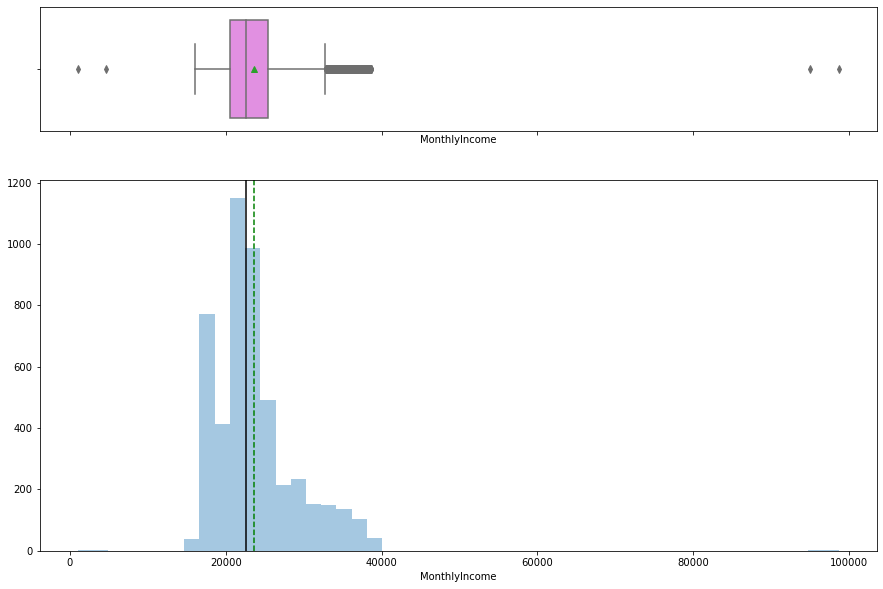

In [23]:
histogram_boxplot(data['MonthlyIncome'])

**Observation**

* With a mean value of 23,619 and median of 22,347 there are so many outliers the right and a few to the left of the distribution.

### Univariate Analysis on Categorical Variables

In [24]:
# User defined function to generate barplot of my variables to indicate percentage each category
# This is essential so that I do not have to repeat
# the same block of codes for each variable

## PARAM:
## plot - 
## feature - categorical feature array

def bar_by_percentage(plot, feature):
    # get length of the column
    total = len(feature)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

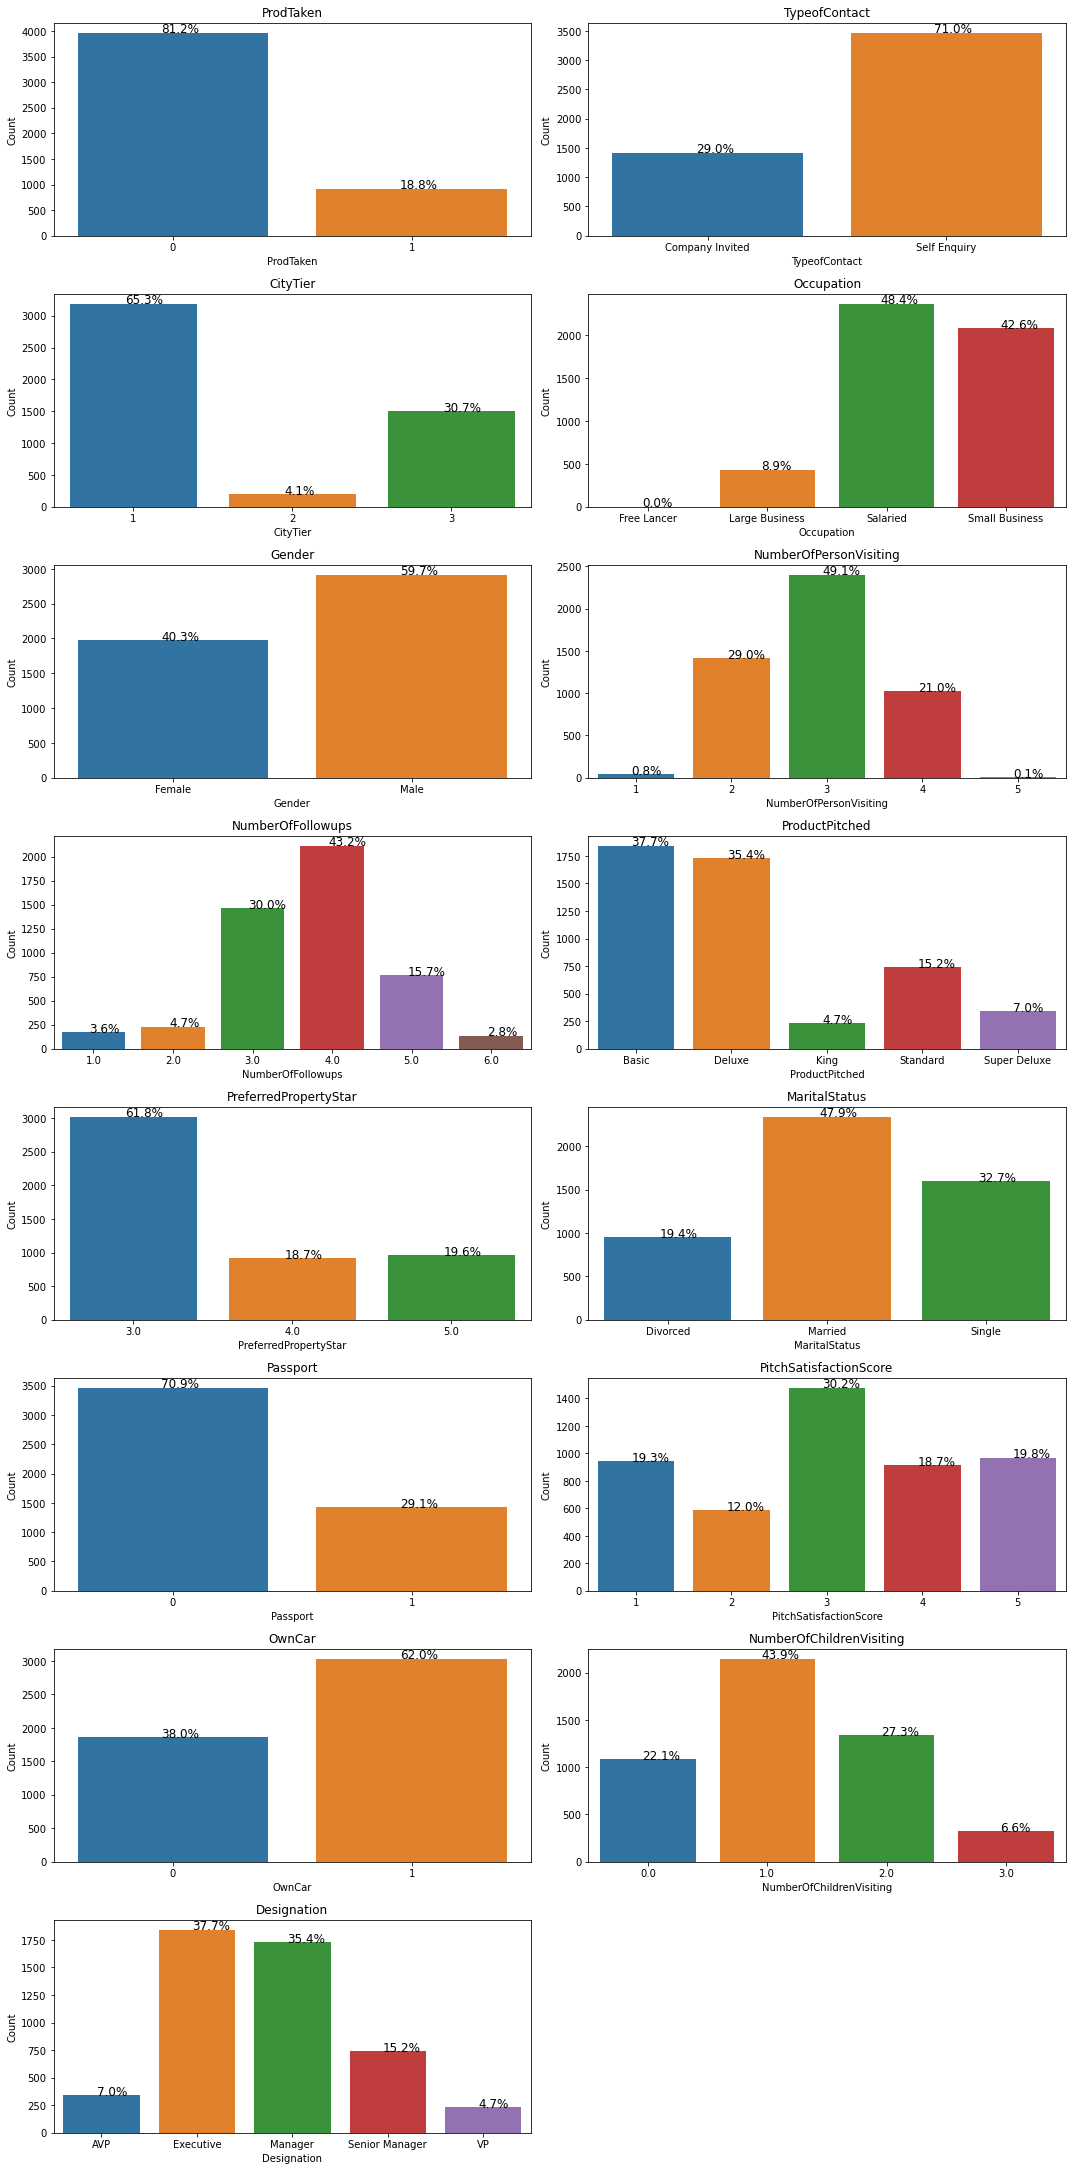

In [25]:
category_columns = category_variables.columns

plt.figure(figsize=(15,75))

for i in range(len(category_columns)):
    plt.subplot(20, 2, i+1)
    ax = sns.countplot(data[category_columns[i]])
    plt.xlabel(category_columns[i])
    plt.ylabel('Count')
    bar_by_percentage(ax, data[category_columns[i]])
    plt.tight_layout()
    plt.title(category_columns[i])
    

**Observation**

- Customers who have purchase pacakges is about 19%.
- Self enquiry is 71% while company invited is 28%
- 

## Bivariate Analysis

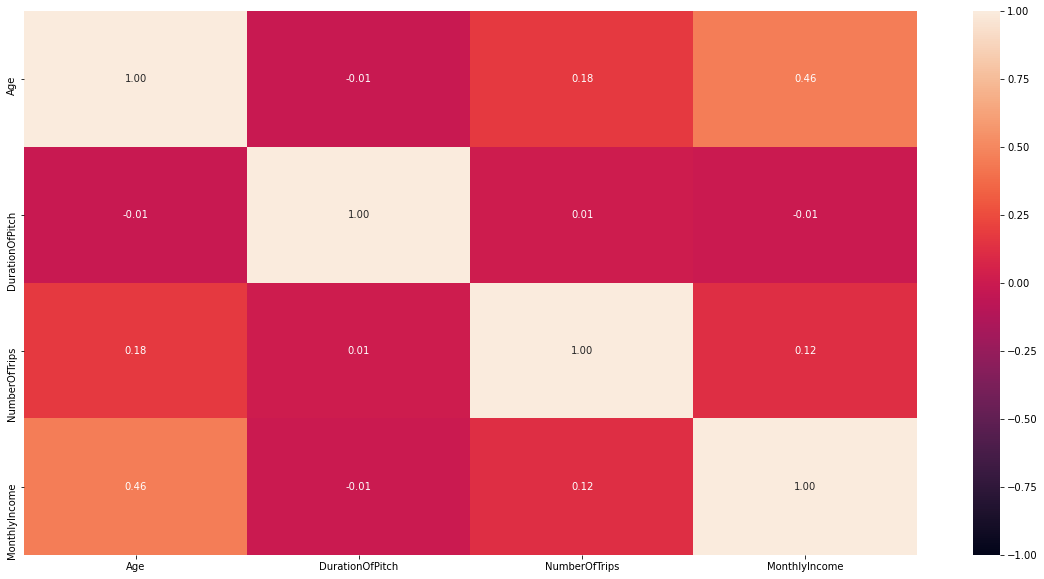

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

**Observation**

* We notice a good positive correction(0.46) between Age and Monthly. It indicates that as age increase monthly income tend to increase.
* There is a slight positive correction between age and number of trips.
* We also notice a slight positive correction between monthly income and number of trips

### Numeric Variables vs ProdTaken

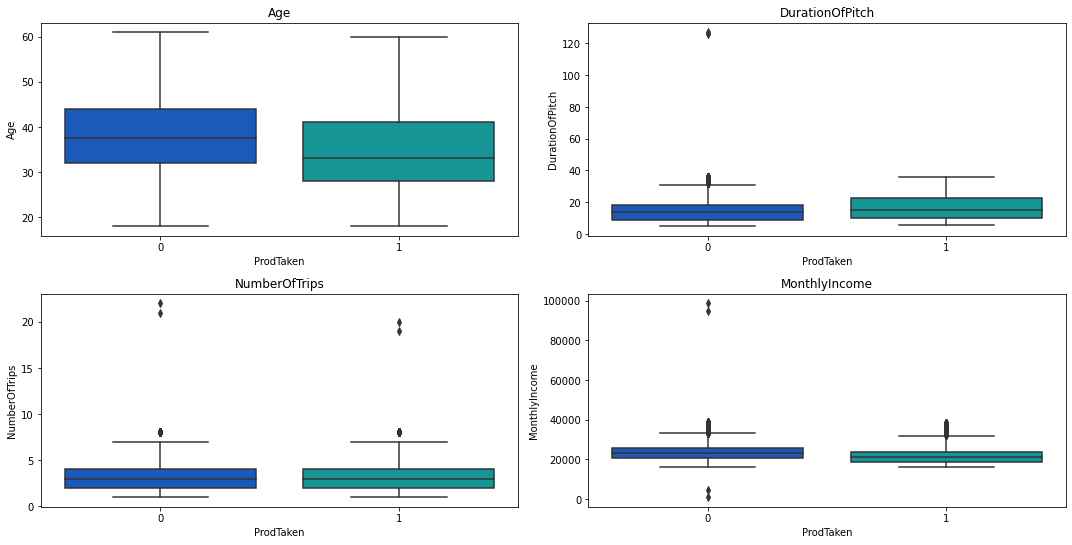

In [27]:
plt.figure(figsize=(15,75))

for i, variable in enumerate(numeric_variables.columns.tolist()):
     plt.subplot(20,2,i+1)
     sns.boxplot(data["ProdTaken"], data[variable], palette="winter")
     plt.tight_layout()
     plt.title(variable)
    
plt.show()

**Observation**

- Younger people seem to purchase more packages than older ones.
- Higher duration of pitch has slight positive effect on purchases.
- Number of trips doesn't seem to have any effect of purchase of packages.


### Categorical Vairables vs ProdTaken

In [28]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    print('-'*120)
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

------------------------------------------------------------------------------------------------------------------------
ProdTaken     0    1   All
ProdTaken                 
0          3968    0  3968
1             0  920   920
All        3968  920  4888


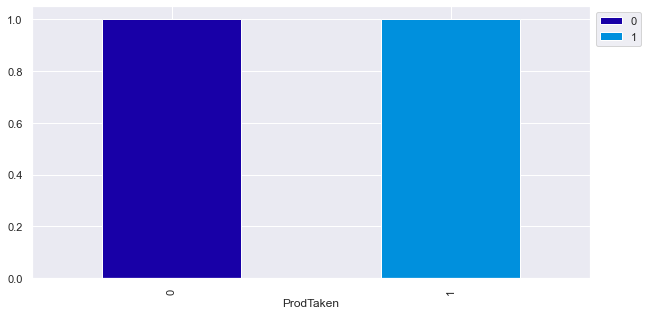

------------------------------------------------------------------------------------------------------------------------
ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888


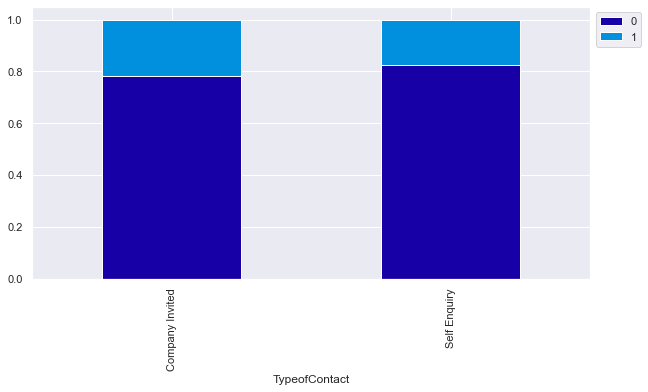

------------------------------------------------------------------------------------------------------------------------
ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888


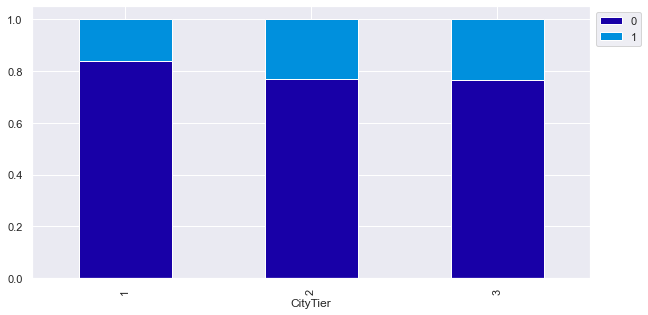

------------------------------------------------------------------------------------------------------------------------
ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888


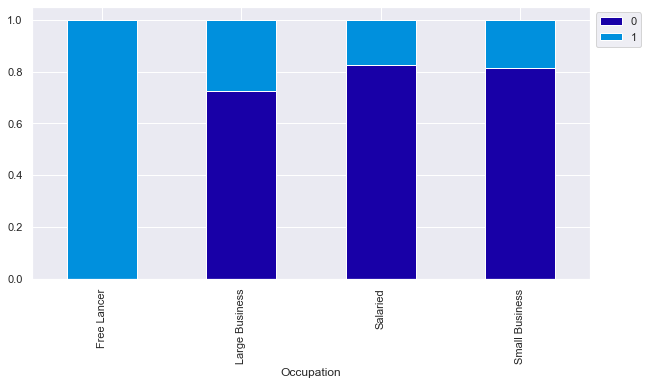

------------------------------------------------------------------------------------------------------------------------
ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888


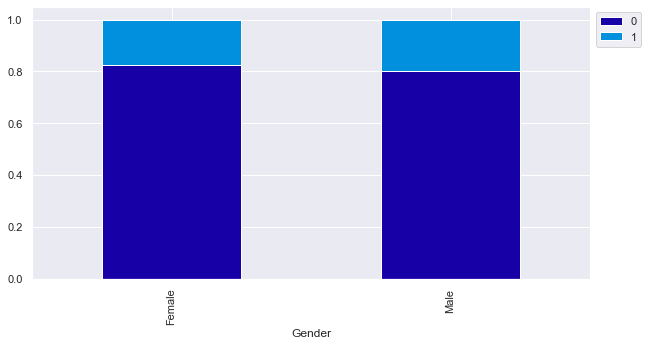

------------------------------------------------------------------------------------------------------------------------
ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888


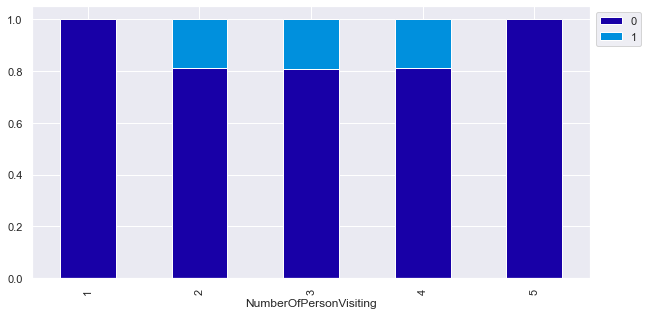

------------------------------------------------------------------------------------------------------------------------
ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888


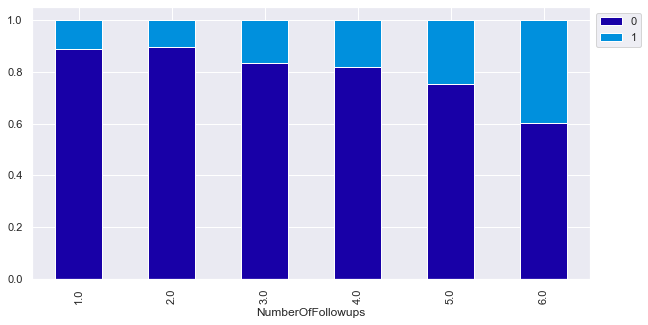

------------------------------------------------------------------------------------------------------------------------
ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888


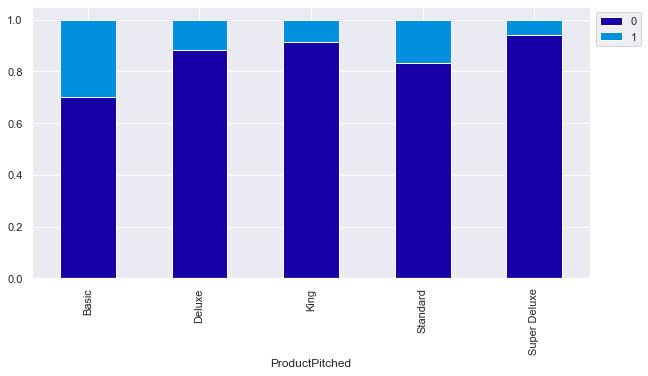

------------------------------------------------------------------------------------------------------------------------
ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888


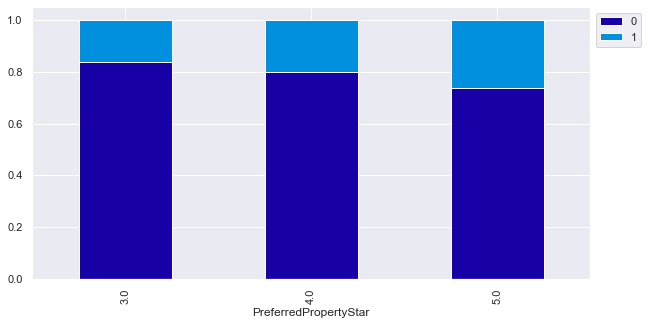

------------------------------------------------------------------------------------------------------------------------
ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single         1128  470  1598
All            3968  920  4888


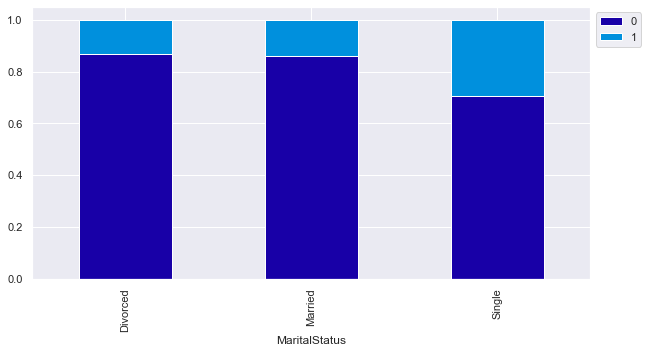

------------------------------------------------------------------------------------------------------------------------
ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888


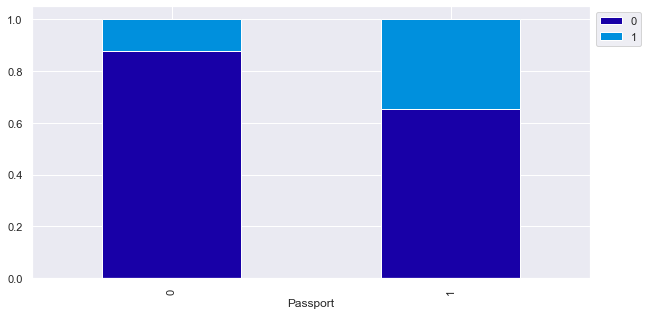

------------------------------------------------------------------------------------------------------------------------
ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888


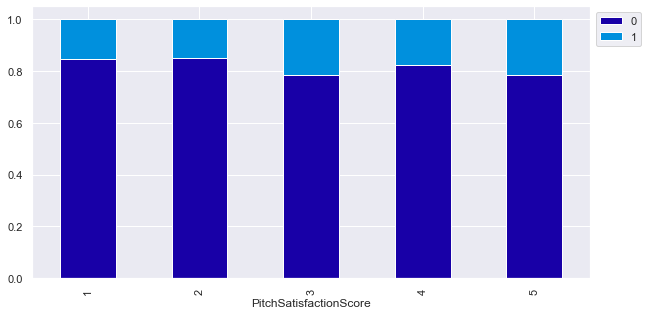

------------------------------------------------------------------------------------------------------------------------
ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888


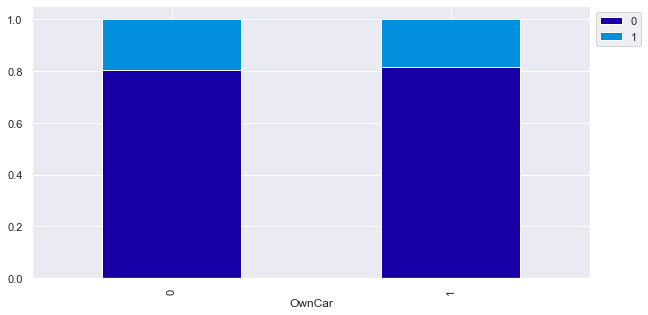

------------------------------------------------------------------------------------------------------------------------
ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        880  202  1082
1.0                       1747  399  2146
2.0                       1082  253  1335
3.0                        259   66   325
All                       3968  920  4888


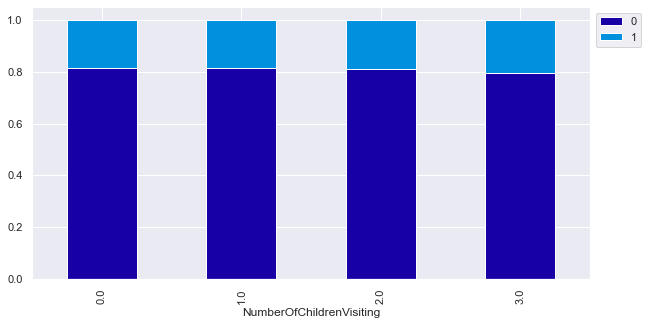

------------------------------------------------------------------------------------------------------------------------
ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888


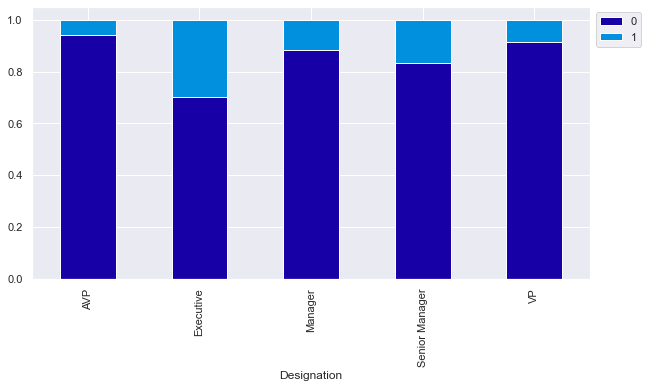

In [29]:
for c in category_variables:
    stacked_plot(data[c])


**Observation**

- Company invited has slight ahead of self enquiry is purchase of packages
- More people in city tier 2 and 3 purchased more product that those in city tier 1
- The only 2 freelancers and ~30% of people who work in large organisation purchased packages
- There is no much difference between male and female customers. ~20% of of each purchased packages.
- When visiting persons are 2, 3 and 4 about 20% of the them purchased packages
- There is a slight increase in purchase of packages as the number of visit increase, 1 and 2 visits is at ~10% purchases, 3 at 18%, 4 at 19%, 5 visits result to ~30%, and 6 visits generated 40% purchases of packages.
- For products pitched, basic takes 30% followed by Standard at 17%
- We have also noticed a slight increase in purchased as prefered property star increase.
- There is no clear difference between owning a car, number of children visiting and package purchase
- We noticed also that more customers with executives(30%) designation purchased packages than other designations. 

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

### Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [30]:
# load my libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [31]:
X = data.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['ProdTaken']

In [32]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(f"The training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"The testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns")

The training set has 3421 rows and 41 columns
The testing set has 1467 rows and 41 columns


In [33]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [34]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will purchase and the customer doesn't purchase
2. Predicting a customer will not purchase and the cuseter does

### Which case is more important? 
* Predicting that customer will purchase and the customer does not purchase i.e. losing money selling to that customer. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can make marketing expenditure more efficient.

In [35]:
##  Function to calculate our parameters score
def get_metrics_scores(model, flag=True, title='Model Title'):
    '''
    model : classifier to predict values of X

    '''
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    ## add metrics to list
    a = [title, 
         metrics.accuracy_score(y_train, pred_train), metrics.accuracy_score(y_test, pred_test), 
         metrics.recall_score(y_train,pred_train), metrics.recall_score(y_test,pred_test), 
         metrics.precision_score(y_train,pred_train), metrics.precision_score(y_test,pred_test), 
         metrics.f1_score(y_train,pred_train), metrics.f1_score(y_test,pred_test)
        ]
    
    
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ", a[1])
        print("Accuracy on test set : ", a[2])
        
        print("Recall on training set : ", a[3])
        print("Recall on test set : ", a[4])
        
        print("Precision on training set : ", a[5])
        print("Precision on test set : ", a[6])
        
        print("F1 on training set : ", a[7])
        print("F1 on test set : ", a[8])
    
    return a # returning the list with train and test scores

In [36]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Building the model
- We are going to build 7 models here - Bagging Classifier, Random Forest, Decision Tree, AdaBoost Classifier, Gradient Boosting Classifier, XGBoost Classifier, and Stacking Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all four metrics - Accuracy, Precision, Recall, and F1 Score but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a customer will buy the new product when the he does not.

### Define Model Metrics List

In [37]:
models_Metrics = []

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.81,1:0.19} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [38]:
model_DTC = DecisionTreeClassifier(criterion='gini', class_weight={0:0.81,1:0.19}, random_state=1)
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.81, 1: 0.19}, random_state=1)

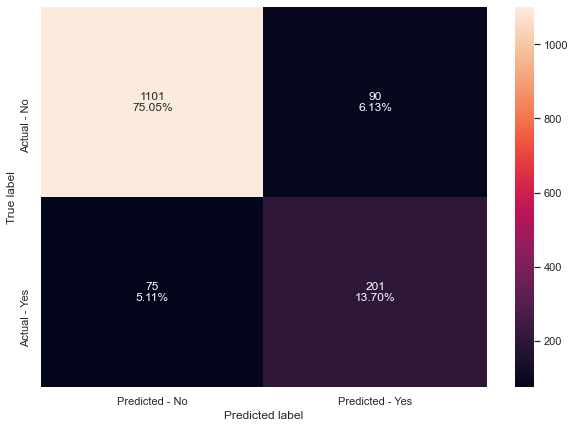

In [39]:
make_confusion_matrix(model_DTC,y_test)

In [40]:
models_Metrics.append(get_metrics_scores(model_DTC, title='Decision Tree (default parameters)'))

Accuracy on training set :  1.0
Accuracy on test set :  0.8875255623721882
Recall on training set :  1.0
Recall on test set :  0.7282608695652174
Precision on training set :  1.0
Precision on test set :  0.6907216494845361
F1 on training set :  1.0
F1 on test set :  0.7089947089947088


- The model is overfitting the training data. The training accuracy is much higher than the test accuracy.
- The model has low test recall. This implies that the model is not good at identifying non buying customers.

### Bagging Classifier

In [41]:
model_Bagging = BaggingClassifier(random_state=1)
model_Bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

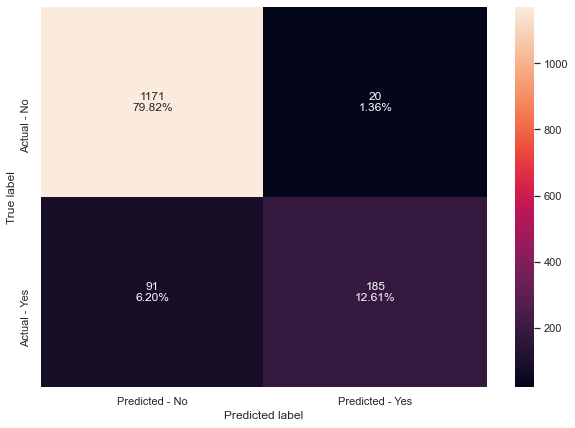

In [42]:
make_confusion_matrix(model_Bagging, y_test)

In [43]:
models_Metrics.append(get_metrics_scores(model_Bagging, title='Bagging (default parameters)'))

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9243353783231084
Recall on training set :  0.9720496894409938
Recall on test set :  0.6702898550724637
Precision on training set :  0.9984051036682615
Precision on test set :  0.9024390243902439
F1 on training set :  0.985051140833989
F1 on test set :  0.7692307692307692


- We notice that test accuracy has increased to 92% while rest recall reduced from 72% to 67%
- The model is also overfitting the training data with the training accuracy is much higher than the test accuracy
- The model has low test recall. This implies that the model is not good at identifying non buying customers.

### Bagging Classifier with Weighted Decision Tree

In [44]:
model_Bagging_WT = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', class_weight={0:0.81,1:0.19},random_state=1), random_state=1)
model_Bagging_WT.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.81,
                                                                      1: 0.19},
                                                        random_state=1),
                  random_state=1)

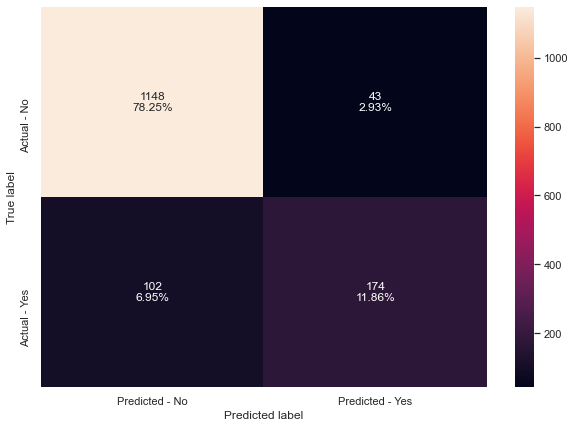

In [45]:
make_confusion_matrix(model_Bagging_WT, y_test)

In [46]:
models_Metrics.append(get_metrics_scores(model_Bagging_WT, title='Bagging (Class Weight)'))

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.9011588275391956
Recall on training set :  0.9658385093167702
Recall on test set :  0.6304347826086957
Precision on training set :  0.9967948717948718
Precision on test set :  0.8018433179723502
F1 on training set :  0.9810725552050472
F1 on test set :  0.7058823529411765


- Just like the Bagging Classifier and Decision Tree, this model is overfitting the training data as the training accuracy is much higher than the test accuracy
- The model has low test recall. This implies that the model is not good at identifying non buying customers.
- And test accuracy has dropped again from 92% to 90% and test recall is now 63%

### Random Forest

In [47]:
model_RandomForest = RandomForestClassifier(random_state=1)
model_RandomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

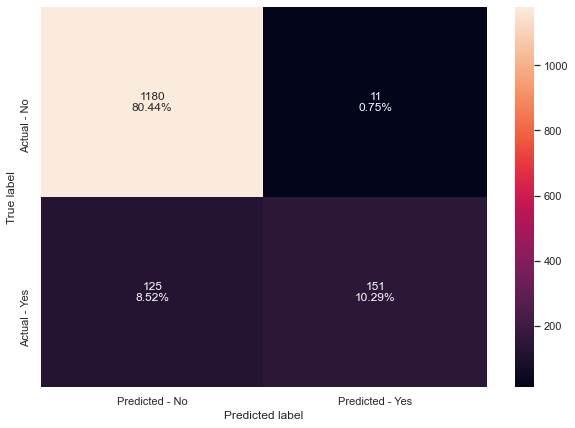

In [48]:
make_confusion_matrix(model_RandomForest, y_test)

In [49]:
models_Metrics.append(get_metrics_scores(model_RandomForest, title='Randome Forest (default parameters)'))

Accuracy on training set :  1.0
Accuracy on test set :  0.907293796864349
Recall on training set :  1.0
Recall on test set :  0.5471014492753623
Precision on training set :  1.0
Precision on test set :  0.9320987654320988
F1 on training set :  1.0
F1 on test set :  0.6894977168949771


- Here again, the model is overfitting the training data as the training accuracy is much higher than the test accuracy
- The model has low test recall. This implies that the model is not good at identifying non buying customers.

### Random Forest with Class Weight

In [50]:
model_RandomForest_WT = RandomForestClassifier(class_weight={0:0.81,1:0.19}, random_state=1)
model_RandomForest_WT.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.81, 1: 0.19}, random_state=1)

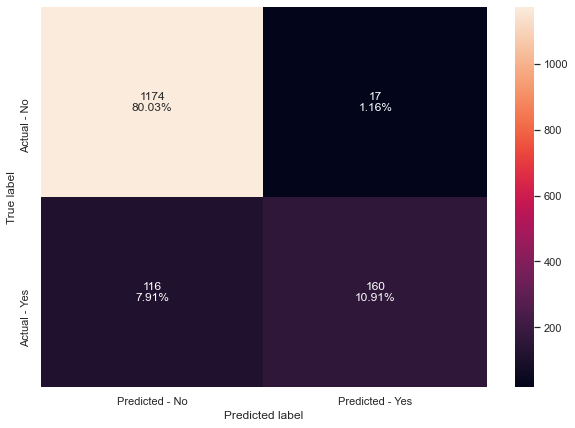

In [51]:
make_confusion_matrix(model_RandomForest_WT, y_test)


In [52]:
models_Metrics.append(get_metrics_scores(model_RandomForest_WT, title='Random Forest (with Class Weight)'))

Accuracy on training set :  1.0
Accuracy on test set :  0.9093387866394002
Recall on training set :  1.0
Recall on test set :  0.5797101449275363
Precision on training set :  1.0
Precision on test set :  0.903954802259887
F1 on training set :  1.0
F1 on test set :  0.7064017660044151


**Again, the model is overfitting the training data**

## Adaboost 

In [53]:
model_Ada = AdaBoostClassifier(random_state=1)
model_Ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

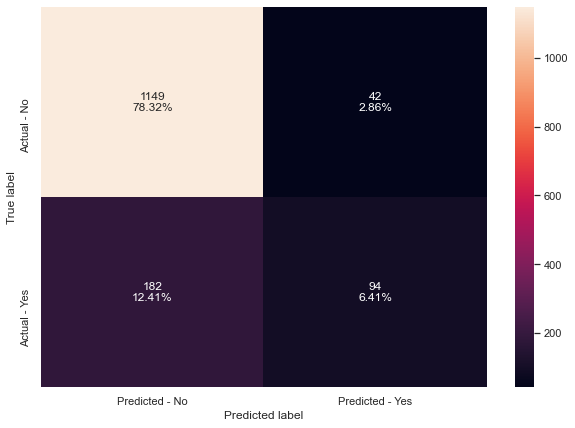

In [54]:
make_confusion_matrix(model_Ada, y_test)

In [55]:
models_Metrics.append(get_metrics_scores(model_Ada, title='AdaBoost (default parameters)'))

Accuracy on training set :  0.8479976615024847
Accuracy on test set :  0.847307430129516
Recall on training set :  0.33695652173913043
Recall on test set :  0.34057971014492755
Precision on training set :  0.7
Precision on test set :  0.6911764705882353
F1 on training set :  0.4549266247379455
F1 on test set :  0.4563106796116505


- This seem to be a better model with training accuracy of 85% and test recall of 34%.
- The model has low test recall. This implies that the model is not good at identifying non buying customers and will be ideal for production environment.

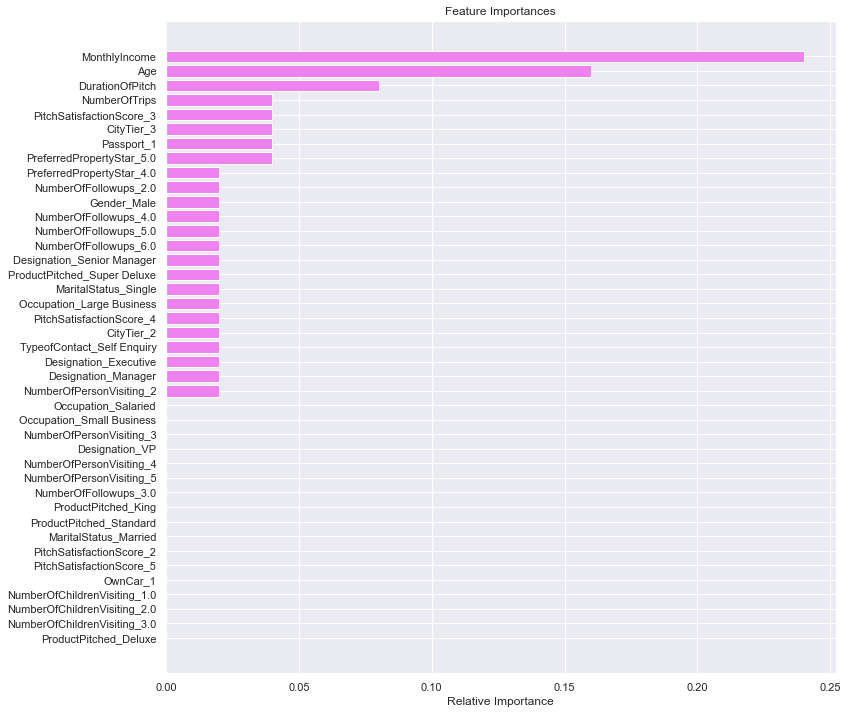

In [56]:
importances = model_Ada.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation**

* Here the most important feature is MonthlyIncome followed by Age and then DurationOfPitch

## Gradient Boost

In [57]:
model_Gradient = GradientBoostingClassifier(random_state=1)
model_Gradient.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

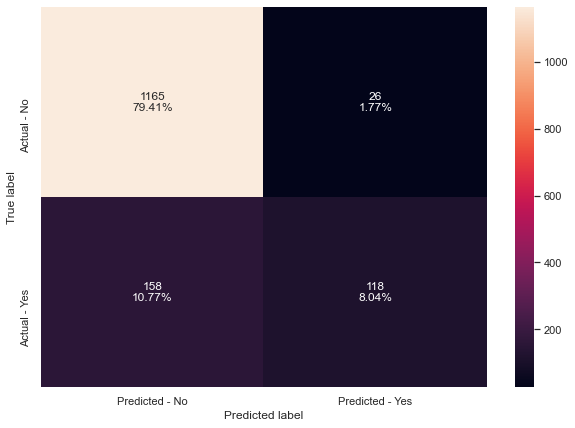

In [58]:
make_confusion_matrix(model_Gradient, y_test)


In [59]:
models_Metrics.append(get_metrics_scores(model_Gradient, title='Gradient Boost'))

Accuracy on training set :  0.8892136802104648
Accuracy on test set :  0.874573960463531
Recall on training set :  0.4704968944099379
Recall on test set :  0.427536231884058
Precision on training set :  0.8885630498533724
Precision on test set :  0.8194444444444444
F1 on training set :  0.615228426395939
F1 on test set :  0.561904761904762


**Observation**

* This is a better model with training and test accuracy of 89% and 87% respective.
* Recall also looks better with train and test of 47% and 42% respectively
* However, recall is still low which indicates that the model is not good at identifier none buying customers.

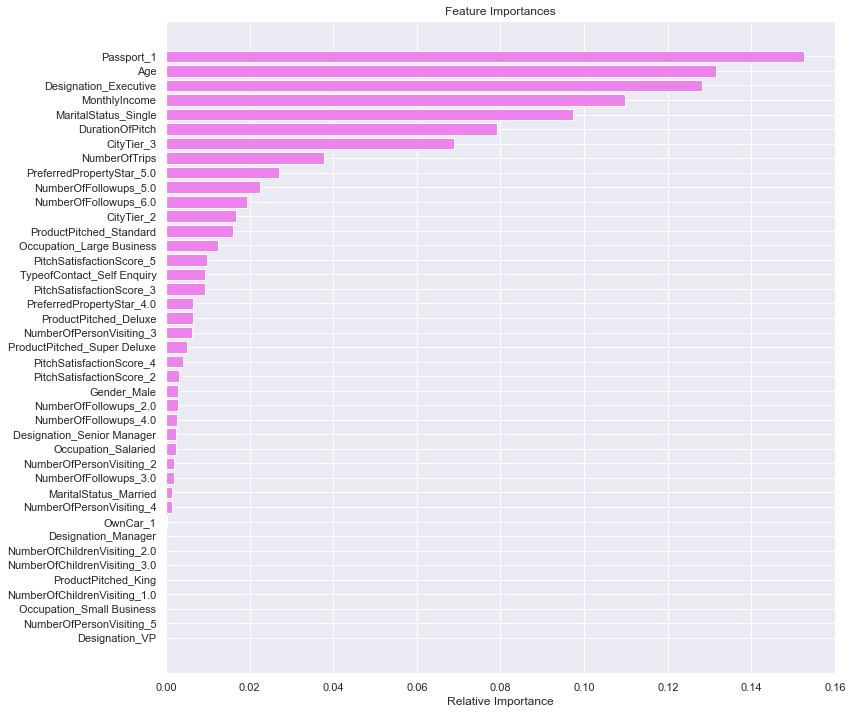

In [60]:
importances = model_Gradient.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation**

* We can notice that here the most important variable is Passport, followed by Age, Designation (executive), Monthly Income, etc

## XGBoost

In [61]:
model_XGBoost = XGBClassifier(random_state=1, eval_metric='logloss')
model_XGBoost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

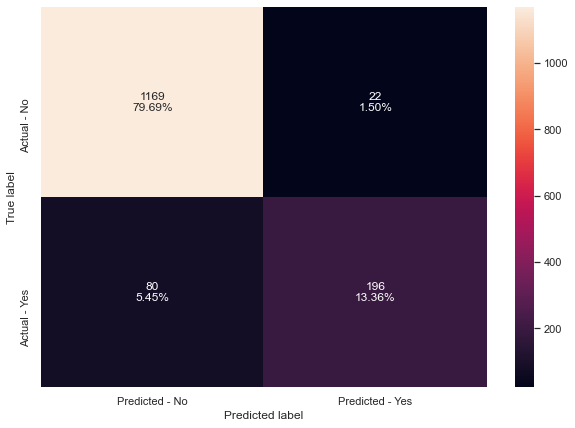

In [62]:
make_confusion_matrix(model_XGBoost, y_test)

In [63]:
models_Metrics.append(get_metrics_scores(model_XGBoost, title='XGBoost'))

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9304703476482618
Recall on training set :  0.9984472049689441
Recall on test set :  0.7101449275362319
Precision on training set :  1.0
Precision on test set :  0.8990825688073395
F1 on training set :  0.9992229992229993
F1 on test set :  0.7935222672064779


**This is still another overfitting model and will not be good at identifing non buying customers**

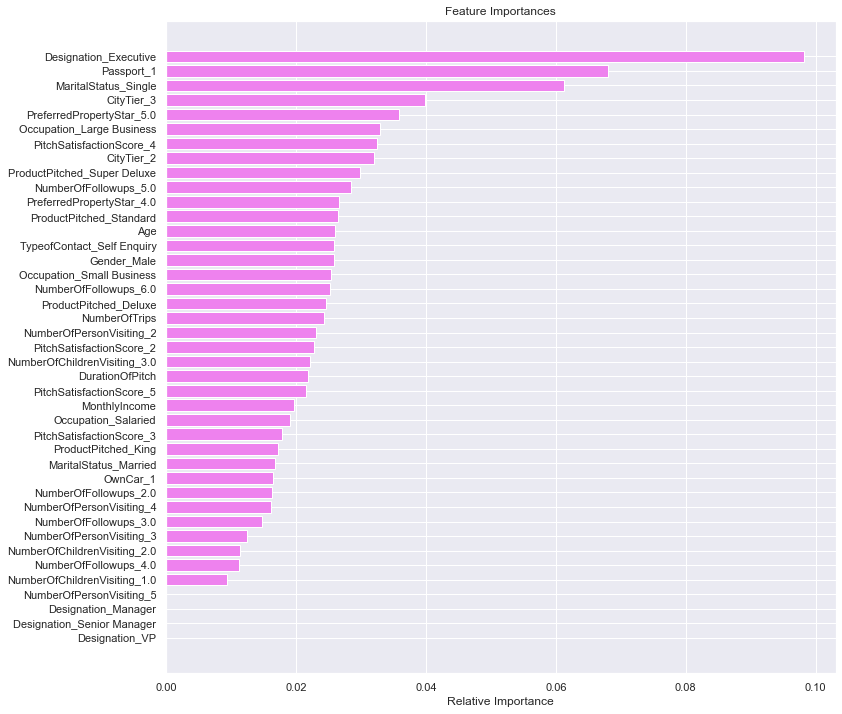

In [64]:
importances = model_XGBoost.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation**

* Here the most important feature is Designation_Executive unlike Adaboost and Gradient Boost.

## Hyperparameter Tuning

### Adaboost Classifier With Tuning

In [65]:
# Choose the type of classifier. 
model_AdaTuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=4)],
    "n_estimators": np.arange(50,160,10),
    "learning_rate":np.arange(0.6, 1, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(model_AdaTuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_AdaTuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_AdaTuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.6, n_estimators=80, random_state=1)

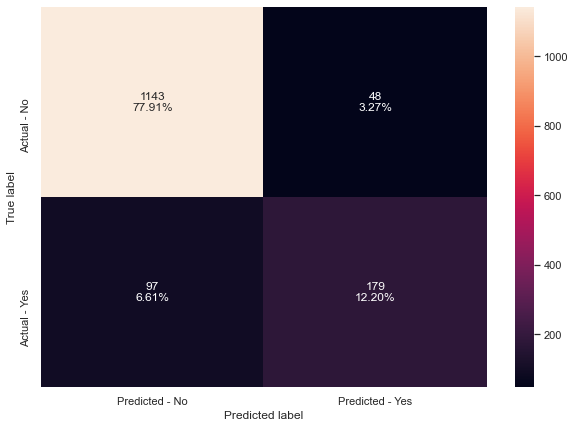

In [66]:
make_confusion_matrix(model_AdaTuned, y_test)

In [67]:
models_Metrics.append(get_metrics_scores(model_AdaTuned, title='Tuned AdaBoost'))

Accuracy on training set :  1.0
Accuracy on test set :  0.9011588275391956
Recall on training set :  1.0
Recall on test set :  0.6485507246376812
Precision on training set :  1.0
Precision on test set :  0.788546255506608
F1 on training set :  1.0
F1 on test set :  0.7117296222664016


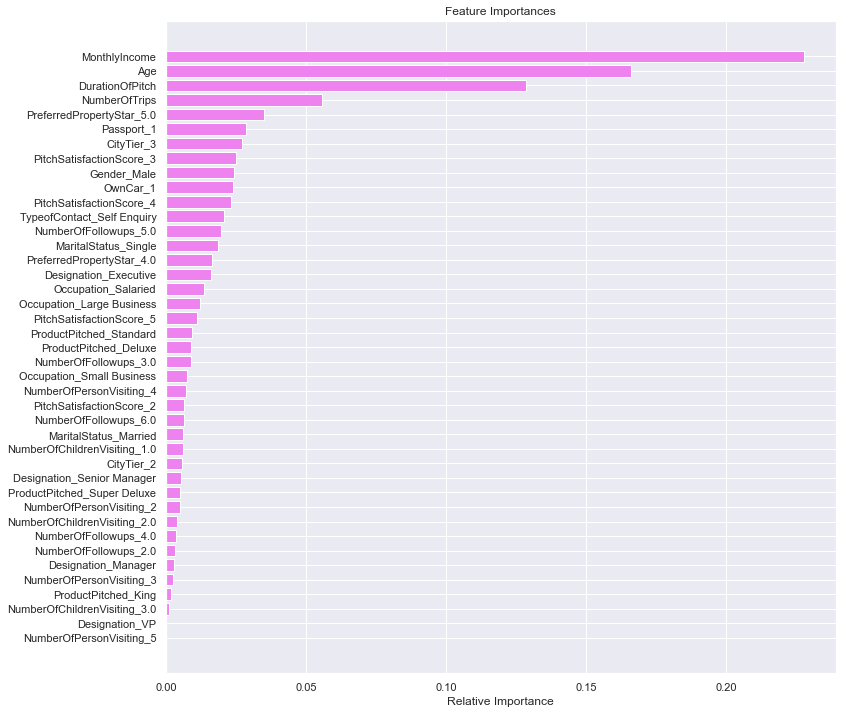

In [68]:
importances = model_AdaTuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation**

* MonthlyIncome, here again, shows to be the most important feature.

### Gradient Boost Classifier With Tuning

In [69]:
# Choose the type of classifier. 
#model_GradientTuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
model_GradientTuned = GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=3, random_state=1),random_state=1)


# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(model_GradientTuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_GradientTuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_GradientTuned.fit(X_train, y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=3,
                                                       random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

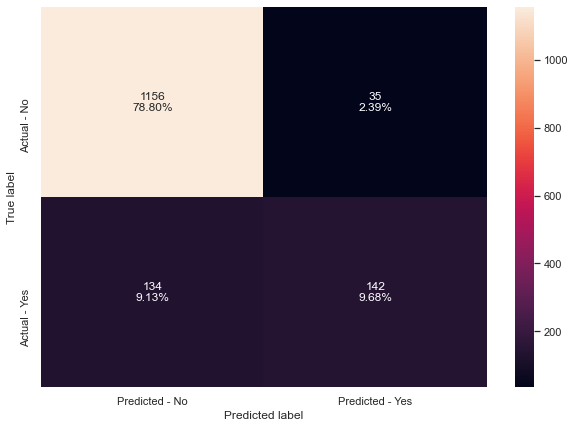

In [70]:
make_confusion_matrix(model_GradientTuned, y_test)

In [71]:
models_Metrics.append(get_metrics_scores(model_GradientTuned, title='Tune Gradient Boost'))

Accuracy on training set :  0.9245834551300789
Accuracy on test set :  0.8847989093387867
Recall on training set :  0.6475155279503105
Recall on test set :  0.5144927536231884
Precision on training set :  0.9308035714285714
Precision on test set :  0.8022598870056498
F1 on training set :  0.7637362637362636
F1 on test set :  0.6269315673289183


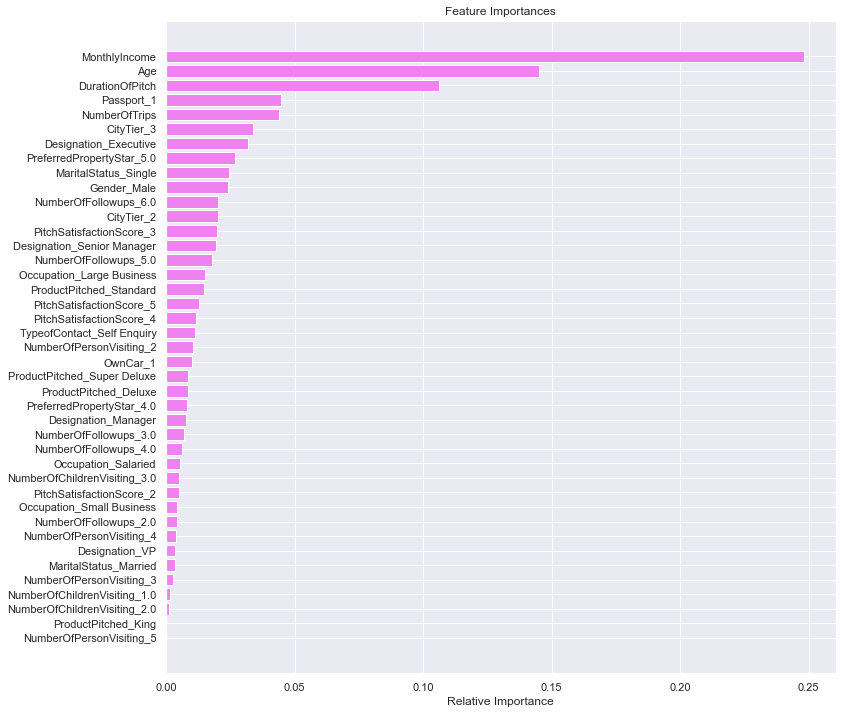

In [72]:
importances = model_GradientTuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost With Tuning

In [73]:
# Choose the type of classifier. 
model_XGBoostTuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2],
    "subsample":[0.5,0.7,0.9],
    "learning_rate":[0.01, 0.1, 0.2],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(model_XGBoostTuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_XGBoostTuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_XGBoostTuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

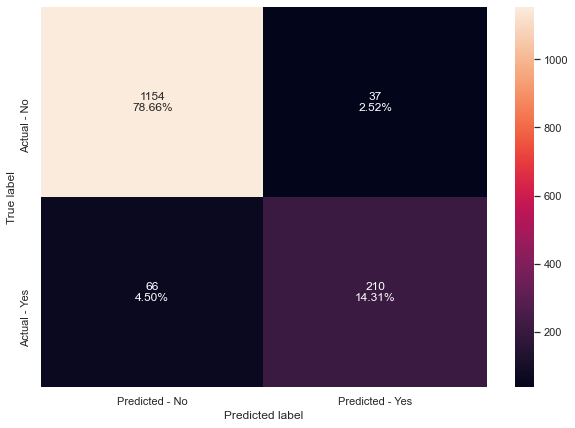

In [74]:
make_confusion_matrix(model_XGBoostTuned, y_test)

In [75]:
models_Metrics.append(get_metrics_scores(model_XGBoostTuned, title='Tuned XGBoost'))

Accuracy on training set :  0.997953814674072
Accuracy on test set :  0.9297886843899114
Recall on training set :  0.9953416149068323
Recall on test set :  0.7608695652173914
Precision on training set :  0.993798449612403
Precision on test set :  0.8502024291497976
F1 on training set :  0.9945694336695112
F1 on test set :  0.8030592734225622


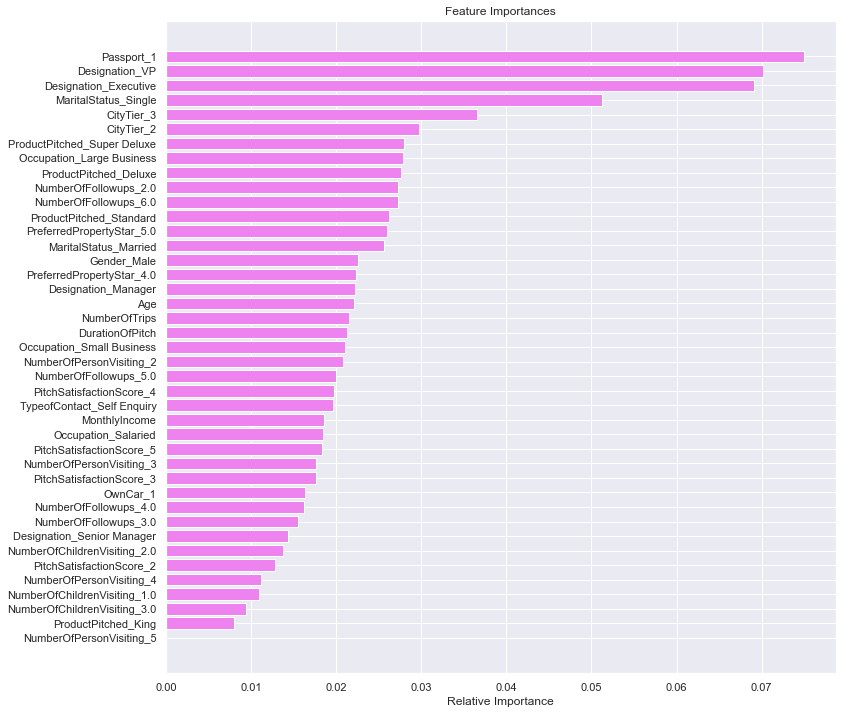

In [76]:
importances = model_XGBoostTuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [77]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(importances, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
Passport_1                    0.074932
Designation_VP                0.070120
Designation_Executive         0.069154
MaritalStatus_Single          0.051242
CityTier_3                    0.036528
CityTier_2                    0.029721
ProductPitched_Super Deluxe   0.028001
Occupation_Large Business     0.027882
ProductPitched_Deluxe         0.027641
NumberOfFollowups_2.0         0.027281
NumberOfFollowups_6.0         0.027247
ProductPitched_Standard       0.026173
PreferredPropertyStar_5.0     0.026014
MaritalStatus_Married         0.025608
Gender_Male                   0.022575
PreferredPropertyStar_4.0     0.022358
Designation_Manager           0.022239
Age                           0.022082
NumberOfTrips                 0.021553
DurationOfPitch               0.021287
Occupation_Small Business     0.021047
NumberOfPersonVisiting_2      0.020829
NumberOfFollowups_5.0         0.019931
PitchSatisfactionScore_4      0.019764
TypeofContact_Self Enquir

## Stacking Classifier

In [78]:
estimators = [
    ('Decision Tree', model_DTC),
    ('Random Forest', model_RandomForest),
    ('Random Forest WT', model_RandomForest_WT),
    ('Bagging', model_Bagging),
    ('Bagging WT', model_Bagging_WT),
    ('Adaboost', model_Ada),
    ('Gradient Boost', model_Gradient),
    ('XGBoost', model_XGBoost),
    ('Tuned Adaboost', model_AdaTuned),
    ('Tuned Gradient Boost', model_GradientTuned),
    ('Tuned XGBoost', model_XGBoostTuned)
]

# define the stacking ensemble
#model_Stacking = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state=1, eval_metric='logloss'))
model_Stacking = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=1))
model_Stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.81,
                                                                     1: 0.19},
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Random Forest WT',
                                RandomForestClassifier(class_weight={0: 0.81,
                                                                     1: 0.19},
                                                       random_state=1)),
                               ('Bagging', BaggingClassifier(random_state=1)),
                               ('Bagging WT',
                                BaggingClassifier(base_estimator...
                                              interaction_constraints='',
                                              lear

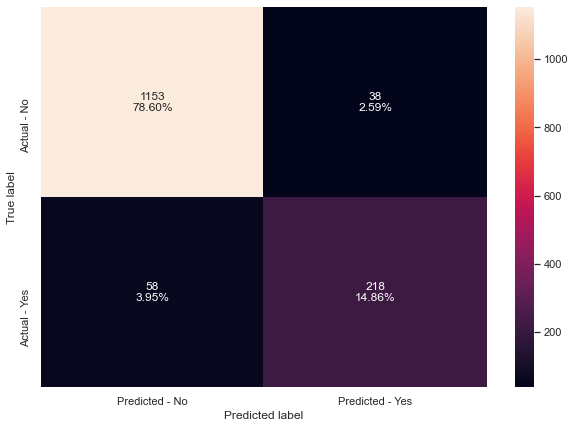

In [79]:
make_confusion_matrix(model_Stacking, y_test)

In [80]:
models_Metrics.append(get_metrics_scores(model_Stacking, title='Stacking Model'))

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.934560327198364
Recall on training set :  0.9968944099378882
Recall on test set :  0.7898550724637681
Precision on training set :  1.0
Precision on test set :  0.8515625
F1 on training set :  0.9984447900466563
F1 on test set :  0.8195488721804511


## Comparing All Models

In [81]:
dfTitles = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision', 'Train F1', 'Test F1']

comparison_frame = pd.DataFrame(models_Metrics, columns=dfTitles)
comparison_frame

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Decision Tree (default parameters),1.000000,0.887526,1.000000,0.728261,1.000000,0.690722,1.000000,0.708995
1,Bagging (default parameters),0.994446,0.924335,0.972050,0.670290,0.998405,0.902439,0.985051,0.769231
2,Bagging (Class Weight),0.992985,0.901159,0.965839,0.630435,0.996795,0.801843,0.981073,0.705882
3,Randome Forest (default parameters),1.000000,0.907294,1.000000,0.547101,1.000000,0.932099,1.000000,0.689498
4,Random Forest (with Class Weight),1.000000,0.909339,1.000000,0.579710,1.000000,0.903955,1.000000,0.706402
5,AdaBoost (default parameters),0.847998,0.847307,0.336957,0.340580,0.700000,0.691176,0.454927,0.456311
6,Gradient Boost,0.889214,0.874574,0.470497,0.427536,0.888563,0.819444,0.615228,0.561905
7,XGBoost,0.999708,0.930470,0.998447,0.710145,1.000000,0.899083,0.999223,0.793522
8,Tuned AdaBoost,1.000000,0.901159,1.000000,0.648551,1.000000,0.788546,1.000000,0.711730
9,Tune Gradient Boost,0.924583,0.884799,0.647516,0.514493,0.930804,0.802260,0.763736,0.626932


## Business Recommendations

- The business can choose a model depending on their cost function which they want to minimize. The cost function can depend on a number of factors.

- Factors that drive purchase of packages the most include: monthly income, age, designation, duration of pitch

- We emphasized that recall is the metric of interest here and we tuned our model on recall. But this does not mean that other metrics should be ignored completely.


- As number of follow ups increase we noticed that sales increase too. It is only natural that the business should increase the number of follow ups to drive sales.

- People who work for large business, with passport and at the executive level are more likely to purchase packages.

- Younger people seem to purchase more packages than older ones. This is also evident with more higher percentage of customers buying more than others.

- Higher duration of pitch has slight positive effect on purchases.